# Smoke Detection Analysis


In [31]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

Process:-
1. Gathering Data
2. Data preparation
3. Data wrangling
4. Data analysis
5. ML model
6. Hyperparameter tuning
7. Performance Analysis 
8. Conclusion

# Gathering Data

In [32]:
#read data
df=pd.read_csv('smoke_detection_iot.csv')
df.head()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


# Data Preparation

In [33]:
print(df.shape)
print(df.dtypes)

(62630, 16)
Unnamed: 0          int64
UTC                 int64
Temperature[C]    float64
Humidity[%]       float64
TVOC[ppb]           int64
eCO2[ppm]           int64
Raw H2              int64
Raw Ethanol         int64
Pressure[hPa]     float64
PM1.0             float64
PM2.5             float64
NC0.5             float64
NC1.0             float64
NC2.5             float64
CNT                 int64
Fire Alarm          int64
dtype: object


In [34]:
#check missing values
print(df.isnull().sum())

Unnamed: 0        0
UTC               0
Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
CNT               0
Fire Alarm        0
dtype: int64


1    44757
0    17873
Name: Fire Alarm, dtype: int64


<AxesSubplot:xlabel='Fire Alarm', ylabel='count'>

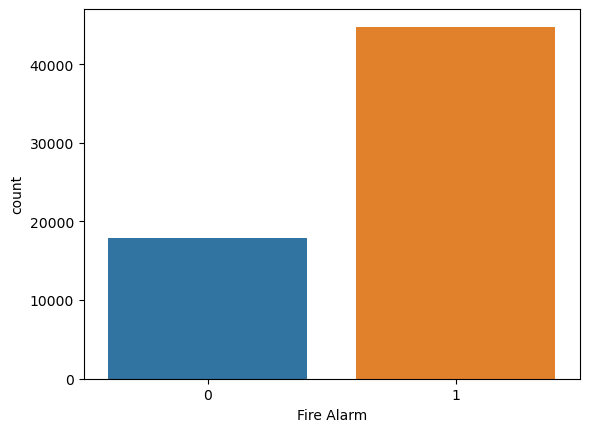

In [35]:
# distribution of target values
print(df['Fire Alarm'].value_counts())
sb.countplot(x=df['Fire Alarm'])

It is an imbalanced dataset

In [36]:
# make the column names simpler
df.rename(columns={'Temperature[C]':'Temperature', 'Humidity[%]':'Humidity', 'TVOC[ppb]':'TVOC',
       'eCO2[ppm]':'eCO2', 'Raw H2':'Raw_H2', 'Raw Ethanol':'Raw_Ethanol', 'Pressure[hPa]':'Pressure','Fire Alarm':'is_Fire'},inplace=True)

In [37]:
# Removing unwanted features
df.drop(columns=['Unnamed: 0','UTC','CNT'],axis=1,inplace=True)
df.columns

Index(['Temperature', 'Humidity', 'TVOC', 'eCO2', 'Raw_H2', 'Raw_Ethanol',
       'Pressure', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0', 'NC2.5', 'is_Fire'],
      dtype='object')

In [38]:
df.describe()

,Temperature,Humidity,TVOC,eCO2,Raw_H2,Raw_Ethanol,Pressure,PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,is_Fire
count,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000
mean,15.970424,48.539499,1942.057528,670.021044,12942.453936,19754.257912,938.627649,100.594309,184.467770,491.463608,203.586487,80.049042,0.714626
std,14.359576,8.865367,7811.589055,1905.885439,272.464305,609.513156,1.331344,922.524245,1976.305615,4265.661251,2214.738556,1083.383189,0.451596
min,-22.010000,10.740000,0.000000,400.000000,10668.000000,15317.000000,930.852000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.994250,47.530000,130.000000,400.000000,12830.000000,19435.000000,938.700000,1.280000,1.340000,8.820000,1.384000,0.033000,0.000000
50%,20.130000,50.150000,981.000000,400.000000,12924.000000,19501.000000,938.816000,1.810000,1.880000,12.450000,1.943000,0.044000,1.000000
75%,25.409500,53.240000,1189.000000,438.000000,13109.000000,20078.000000,939.418000,2.090000,2.180000,14.420000,2.249000,0.051000,1.000000
max,59.930000,75.200000,60000.000000,60000.000000,13803.000000,21410.000000,939.861000,14333.690000,45432.260000,61482.030000,51914.680000,30026.438000,1.000000


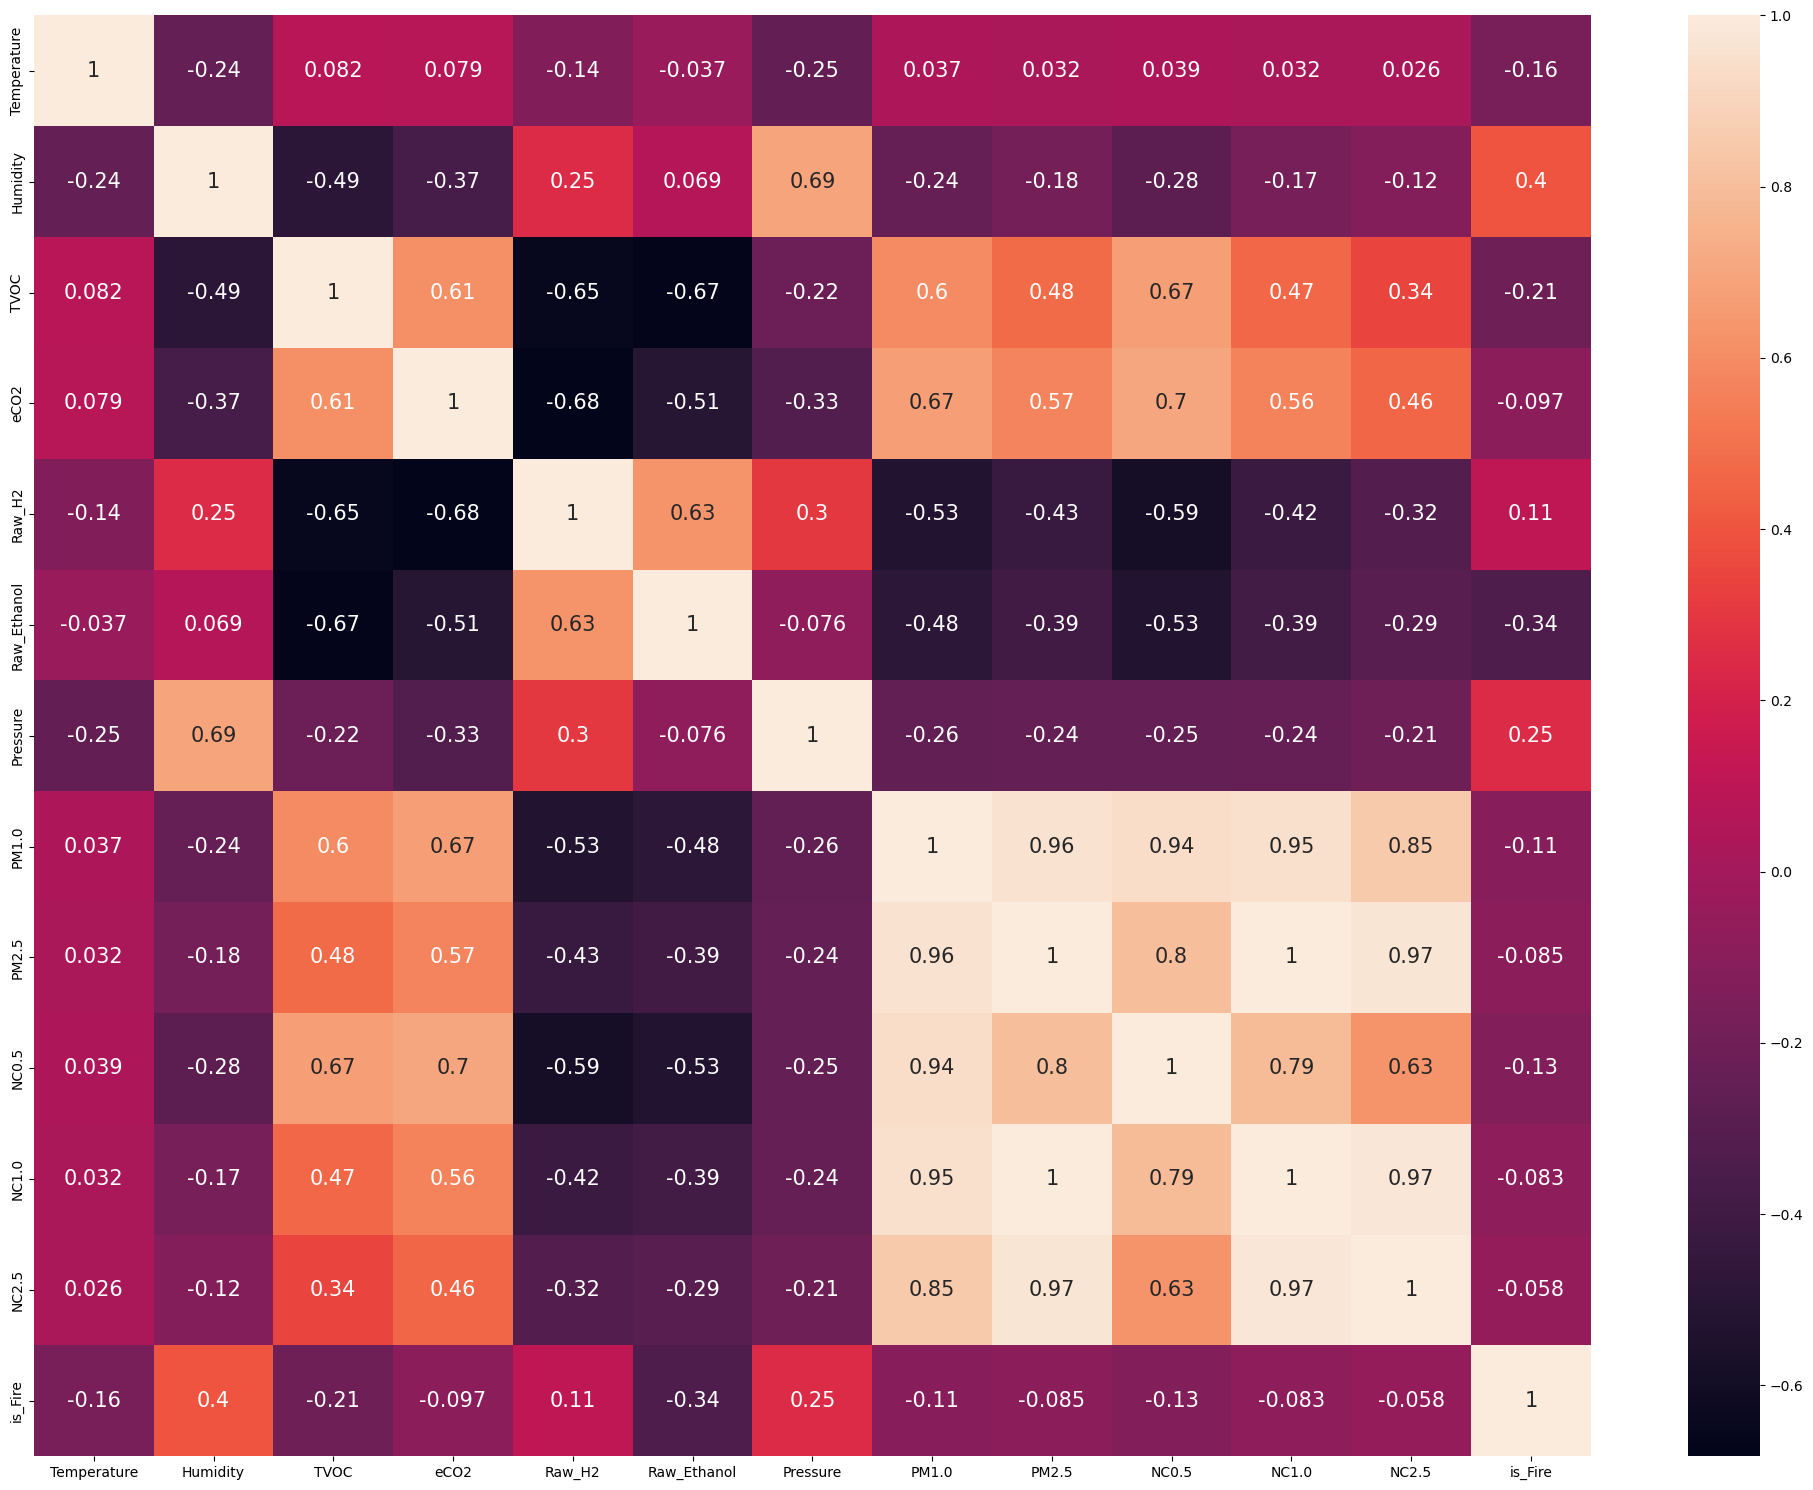

In [39]:
# Correlation between features
fig, ax = plt.subplots(figsize=(20, 15))

sb.heatmap(df.corr(),annot=True, annot_kws={"size":15},)

fig.tight_layout()

Some Insights
1. Humidity and Pressure are highly correlated positive with target variable
2. Raw_Ethanol has high negative correlation with target variable
3. Pressure is highly correlated positively to humidity.
4. PM1.0,PM2.5,NC0.5,NC1.0,NC2.5 have high positive correlation with each other


In [40]:
## Data Wrangling

In [41]:
#check duplicate value
df[df.duplicated(keep=False)]

,Temperature,Humidity,TVOC,eCO2,Raw_H2,Raw_Ethanol,Pressure,PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,is_Fire
51335,26.90,45.15,22,415,12846,20760,937.582,2.04,2.12,14.05,2.190,0.049,0
51385,27.12,44.50,55,412,12832,20717,937.571,2.15,2.23,14.80,2.308,0.052,0
57079,26.90,45.15,22,415,12846,20760,937.582,2.04,2.12,14.05,2.190,0.049,0
57129,27.12,44.50,55,412,12832,20717,937.571,2.15,2.23,14.80,2.308,0.052,0


In [42]:
#drop duplicate values
df= df.drop_duplicates()

In [43]:
X= df.drop(columns=['is_Fire'])
y= df['is_Fire']

# train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)


<AxesSubplot:xlabel='is_Fire', ylabel='count'>

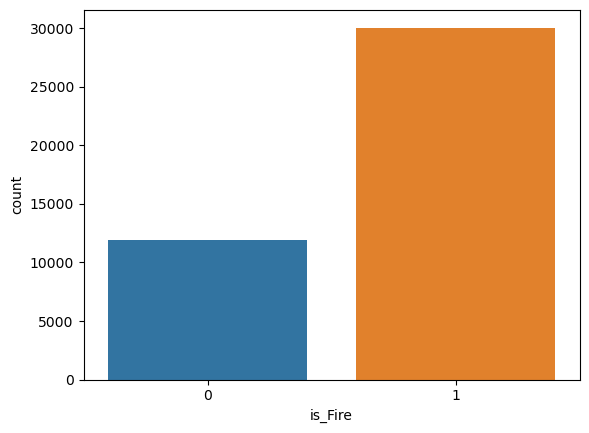

In [44]:
#Balancing imbalanced train dataset
sb.countplot(x=y_train)

In [45]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_smote,y_smote = oversample.fit_resample(X_train,y_train)

<AxesSubplot:xlabel='is_Fire', ylabel='count'>

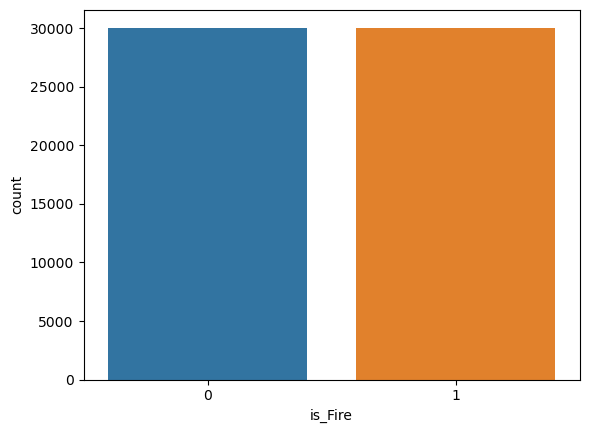

In [46]:
sb.countplot(x=y_smote)

In [47]:
#Scaling
scaler = StandardScaler()
X_smote[:] = scaler.fit_transform(X_smote[:])
X_test[:] = scaler.transform(X_test[:])


# ML Model

In [48]:
lr = LogisticRegression()
lr.fit(X_smote, y_smote)
y_pred_lr = lr.predict(X_test)
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.78      0.92      0.85      5946
           1       0.96      0.90      0.93     14722

    accuracy                           0.90     20668
   macro avg       0.87      0.91      0.89     20668
weighted avg       0.91      0.90      0.91     20668



In [49]:
knn = KNeighborsClassifier()
knn.fit(X_smote,y_smote)
y_pred_knn = knn.predict(X_test)
print(classification_report(y_test,y_pred_knn))

/home/swati/Downloads/ENTER/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5946
           1       1.00      1.00      1.00     14722

    accuracy                           1.00     20668
   macro avg       1.00      1.00      1.00     20668
weighted avg       1.00      1.00      1.00     20668



In [50]:
dt = DecisionTreeClassifier()
dt.fit(X_smote,y_smote)
y_pred_dt = dt.predict(X_test)
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5946
           1       1.00      1.00      1.00     14722

    accuracy                           1.00     20668
   macro avg       1.00      1.00      1.00     20668
weighted avg       1.00      1.00      1.00     20668



In [51]:
rf = RandomForestClassifier()
rf.fit(X_smote,y_smote)
y_pred_rf = rf.predict(X_test)
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5946
           1       1.00      1.00      1.00     14722

    accuracy                           1.00     20668
   macro avg       1.00      1.00      1.00     20668
weighted avg       1.00      1.00      1.00     20668



# Model Evaluation

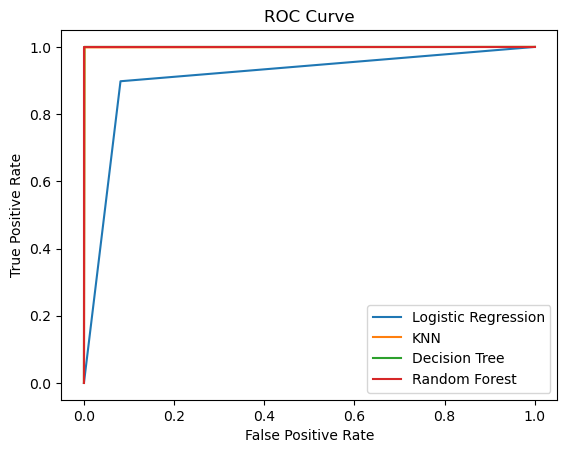

In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Plot the ROC curve for each model
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_pred_lr)
knn_fpr, knn_tpr, _ = roc_curve(y_test, y_pred_knn)
dt_fpr, dt_tpr, _ = roc_curve(y_test, y_pred_dt)
rf_fpr, rf_tpr, _ = roc_curve(y_test, y_pred_rf)

plt.plot(lr_fpr, lr_tpr, label='Logistic Regression')
plt.plot(knn_fpr, knn_tpr, label='KNN')
plt.plot(dt_fpr, dt_tpr, label='Decision Tree')
plt.plot(rf_fpr, rf_tpr, label='Random Forest')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

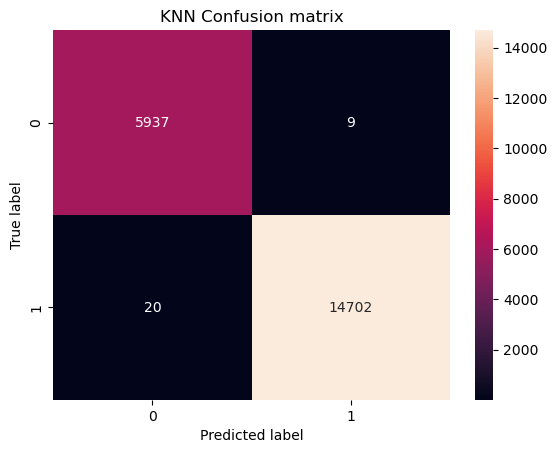

In [53]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
sb.heatmap(confusion_matrix(y_test,y_pred_knn),annot=True,fmt = "d")
plt.title('KNN Confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

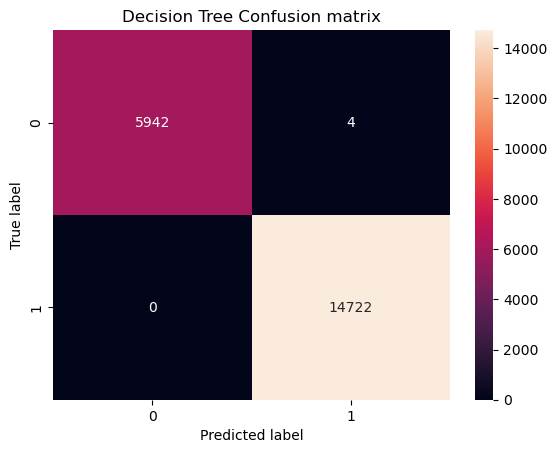

In [54]:
sb.heatmap(confusion_matrix(y_test,y_pred_dt),annot=True,fmt = "d")
plt.title('Decision Tree Confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

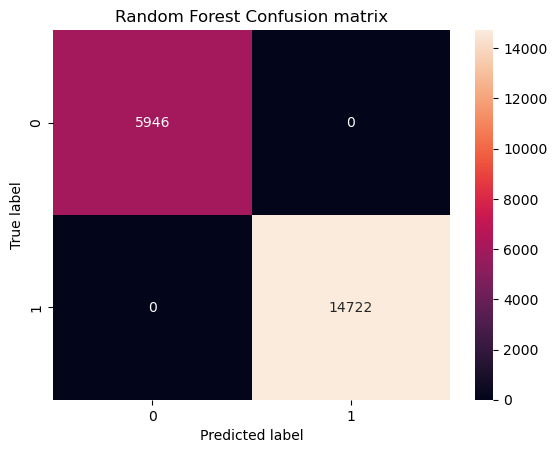

In [55]:
sb.heatmap(confusion_matrix(y_test,y_pred_rf),annot=True,fmt = "d")
plt.title('Random Forest Confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()